# Task 1: Data Preparation

In [1]:
# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib

In [2]:
# Load the data from the file NBA_players_stats.csv using pandas library.
filename = 'NBA_players_stats.csv'
nbaPlayersStats = pd.read_csv(filename, sep=',', decimal='.')
nbaPlayersStats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800


In [3]:
# Clean the data
# Data Type check
nbaPlayersStats.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [4]:
# Handle the capital letter mismatches & redundant whitespace for 'Pos' & 'Tm' columns with type object
columns = ['Pos', 'Tm']
for col in columns:
    nbaPlayersStats[col] = nbaPlayersStats[col].str.strip()
    nbaPlayersStats[col] = nbaPlayersStats[col].str.upper()

In [5]:
# Handle data entry error for 'Pos' column
nbaPlayersStats['Pos'].mask(cond=(nbaPlayersStats['Pos'] == 'PFA'), other='PF', inplace=True)
nbaPlayersStats['Pos'].mask(cond=(nbaPlayersStats['Pos'] == 'SGA'), other='SG', inplace=True)
nbaPlayersStats['Pos'].mask(cond=(nbaPlayersStats['Pos'] == 'SF.'), other='SF', inplace=True)

In [6]:
# I have noticed that the 'Age' column has 2 impossible records (-19 and 280). Replace them to 19 and 280 respectively
nbaPlayersStats['Age'].mask(cond=(nbaPlayersStats['Age'] == -19), other=19, inplace=True)
nbaPlayersStats['Age'].mask(cond=(nbaPlayersStats['Age'] == 280), other=28, inplace=True)

In [7]:
# Check whether the number of games played as starter is greater than the number of games played
print(np.sum(nbaPlayersStats['G'] < nbaPlayersStats['GS']))

# Check whether the number of games played is greater than 82
print(np.sum(nbaPlayersStats['G'] > 82))

0
0


In [8]:
# Check whether column 'MP' has any negative values
print(np.sum(nbaPlayersStats['MP'] < 0))

0


In [9]:
# Check whether the number of 3-Point Field Goal Attempts is greater than the number of 3-Point Field Goals
print(np.sum(nbaPlayersStats['3PA'] < nbaPlayersStats['3P']))

# Check whether the number of 3-Point Field Goal Attempts is smaller than or equal to 0
print(np.sum(nbaPlayersStats['3PA'] <= 0))

# Check whether the number of 3-Point Field Goals is smaller than 0
print(np.sum(nbaPlayersStats['3P'] < 0))

0
33
0


In [10]:
# Remove records with 0 value in 3PA to ensure 3P% does not contain null values
nbaPlayersStats = nbaPlayersStats[nbaPlayersStats['3PA'] > 0]

In [11]:
# Check whether the number of 2-Point Field Goal Attempts is greater than the number of 2-Point Field Goals
print(np.sum(nbaPlayersStats['2PA'] < nbaPlayersStats['2P']))

# Check whether the number of 2-Point Field Goal Attempts is smaller than or equal to 0
print(np.sum(nbaPlayersStats['2PA'] <= 0))

# Check whether the number of 2-Point Field Goals is smaller than 0
print(np.sum(nbaPlayersStats['2P'] < 0))

0
4
0


In [12]:
# Remove records with 0 value in 2PA
nbaPlayersStats = nbaPlayersStats[nbaPlayersStats['2PA'] > 0]

In [13]:
# Check whether the number of Free Throw Attempts is greater than the number of Free Throws
print(np.sum(nbaPlayersStats['FTA'] < nbaPlayersStats['FT']))

# Check whether the number of Free Throw Attempts is smaller than or equal to 0
print(np.sum(nbaPlayersStats['FTA'] <= 0))

# Check whether the number of Free Throws is smaller than 0
print(np.sum(nbaPlayersStats['FT'] < 0))

0
24
0


In [14]:
# Remove records with 0 value in FTA
nbaPlayersStats = nbaPlayersStats[nbaPlayersStats['FTA'] > 0]

In [15]:
# Check to see whether 3P%, 2P%, FT% contain incorrect values due to incorrect calculations
print(np.sum(nbaPlayersStats['3P%'] != round(nbaPlayersStats['3P']/nbaPlayersStats['3PA'], 3)))

print(np.sum(nbaPlayersStats['2P%'] != round(nbaPlayersStats['2P']/nbaPlayersStats['2PA'], 3)))

print(np.sum(nbaPlayersStats['FT%'] != round(nbaPlayersStats['FT']/nbaPlayersStats['FTA'], 3)))

69
70
89


In [16]:
# Re-calculate the '3P%' column
nbaPlayersStats['3P%'] = round(nbaPlayersStats['3P']/nbaPlayersStats['3PA'], 3)

# Re-calculate the '2P%' column
nbaPlayersStats['2P%'] = round(nbaPlayersStats['2P']/nbaPlayersStats['2PA'], 3)

# Re-calculate the 'FT%' column 
nbaPlayersStats['FT%'] = round(nbaPlayersStats['FT']/nbaPlayersStats['FTA'], 3)

In [17]:
# Re-calculate the 'FG' and 'FGA' columns
nbaPlayersStats['FG'] = nbaPlayersStats['3P'] + nbaPlayersStats['2P']

nbaPlayersStats['FGA'] = nbaPlayersStats['3PA'] + nbaPlayersStats['2PA']

In [18]:
# Check whether the number of Field Goal Attempts is greater than the Field Goals
print(np.sum(nbaPlayersStats['FGA'] < nbaPlayersStats['FG']))

# Check whether the number of Field Goal Attempts is greater than the number of Field Goals
print(np.sum(nbaPlayersStats['FGA'] < nbaPlayersStats['FG']))

# Check whether the number of Field Goal Attempts is smaller than or equal to 0
print(np.sum(nbaPlayersStats['FGA'] <= 0))

# Check whether the number of Field Goals is smaller than 0
print(np.sum(nbaPlayersStats['FG'] < 0))

0
0
0
0


In [19]:
# Re-calculate the column 'FG' based on column 'FG' and column 'FGA'
nbaPlayersStats['FG%'] = round(nbaPlayersStats['FG']/nbaPlayersStats['FGA'], 3)

In [20]:
# Check whether there is any null value in the dataset
nbaPlayersStats.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [21]:
# Check whether column 'ORB' and 'DRB' has any negative values
print(np.sum(nbaPlayersStats['ORB'] < 0))
print(np.sum(nbaPlayersStats['DRB'] < 0))

0
0


In [22]:
# Re-calculate the 'TRB' column based on 'DRB' and 'ORB'
nbaPlayersStats['TRB'] = nbaPlayersStats['ORB'] + nbaPlayersStats['DRB']

In [23]:
# Check whether column 'AST', 'STL', 'BLK' and 'TOV' has any negative values
print(np.sum(nbaPlayersStats['AST'] < 0))
print(np.sum(nbaPlayersStats['STL'] < 0))
print(np.sum(nbaPlayersStats['BLK'] < 0))
print(np.sum(nbaPlayersStats['TOV'] < 0))

0
0
0
0


In [24]:
# Ensure each player is disaqualified for a maxium of 6 fouls per game
print(np.sum(nbaPlayersStats['PF'] > 6*nbaPlayersStats['G']))
print(np.sum(nbaPlayersStats['PF'] < 0))

0
0


In [25]:
# Re-calculate the player's total points
nbaPlayersStats['PTS'] = 3*nbaPlayersStats['3P'] + 2*nbaPlayersStats['2P'] + nbaPlayersStats['FT']

# Ensure the player's total points are smaller than 2000
np.sum(nbaPlayersStats['PTS'] >= 2000)

0

In [26]:
nbaPlayersStats.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,252.541020,25.818182,24.290466,11.745011,564.935698,96.700665,208.676275,0.446632,30.707317,83.310421,...,0.749670,21.789357,79.957871,101.747228,59.192905,17.791574,11.075388,31.860310,45.733925,264.882483
std,140.221634,4.081147,9.661947,12.912154,359.681047,82.012961,169.491008,0.091532,29.882487,75.804640,...,0.165817,22.984294,64.962488,83.524623,62.265279,13.265193,12.942045,28.318514,30.084846,227.419948
min,3.000000,19.000000,2.000000,0.000000,6.000000,0.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,132.500000,23.000000,17.000000,0.500000,246.500000,31.000000,70.500000,0.395000,5.500000,19.000000,...,0.684000,6.000000,30.000000,38.000000,15.000000,6.000000,3.000000,11.000000,21.000000,83.000000
50%,256.000000,25.000000,26.000000,6.000000,572.000000,79.000000,174.000000,0.443000,23.000000,63.000000,...,0.778000,15.000000,64.000000,81.000000,41.000000,15.000000,7.000000,25.000000,43.000000,208.000000
75%,374.500000,28.500000,33.000000,23.000000,846.000000,140.500000,305.500000,0.497000,49.000000,127.000000,...,0.852500,28.000000,116.000000,144.000000,77.000000,26.500000,15.000000,45.000000,65.500000,382.000000
max,492.000000,37.000000,38.000000,37.000000,1358.000000,379.000000,764.000000,0.762000,169.000000,411.000000,...,1.000000,133.000000,357.000000,472.000000,345.000000,63.000000,111.000000,149.000000,228.000000,1053.000000


<AxesSubplot:ylabel='Frequency'>

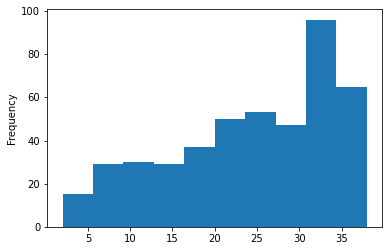

In [27]:
# Draw historgram for each column to find outliers
nbaPlayersStats['G'].plot(kind='hist', bins = 10)

<AxesSubplot:ylabel='Frequency'>

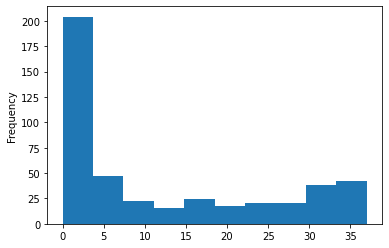

In [28]:
nbaPlayersStats['GS'].plot(kind='hist', bins = 10)

<AxesSubplot:ylabel='Frequency'>

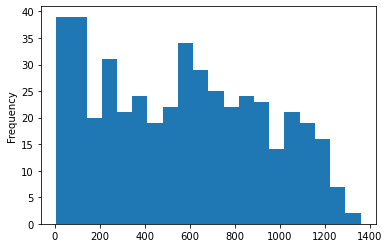

In [29]:
nbaPlayersStats['MP'].plot(kind='hist', bins = 20)

<AxesSubplot:ylabel='Frequency'>

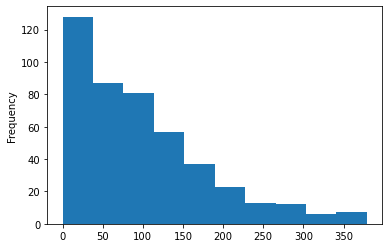

In [30]:
nbaPlayersStats['FG'].plot(kind='hist', bins = 10)

<AxesSubplot:ylabel='Frequency'>

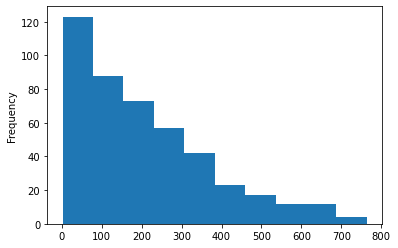

In [31]:
nbaPlayersStats['FGA'].plot(kind='hist', bins = 10)

<AxesSubplot:ylabel='Frequency'>

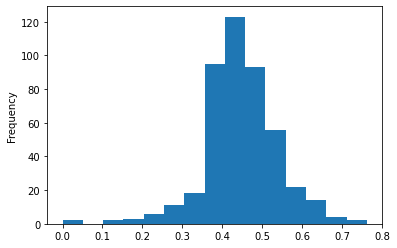

In [32]:
nbaPlayersStats['FG%'].plot(kind='hist', bins = 15)

In [33]:
np.sum(nbaPlayersStats['FG%'] == 0)

2

In [34]:
# Delete the records
nbaPlayersStats = nbaPlayersStats[nbaPlayersStats['FG%'] != 0]

<AxesSubplot:ylabel='Frequency'>

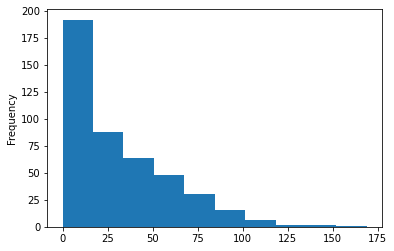

In [35]:
nbaPlayersStats['3P'].plot(kind='hist', bins = 10)

In [36]:
# Delete the record since they have both '3P' and '3PA' which much higher compared to the rest
nbaPlayersStats = nbaPlayersStats[nbaPlayersStats['3P'] < 150]

<AxesSubplot:ylabel='Frequency'>

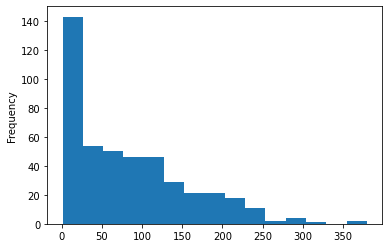

In [37]:
nbaPlayersStats['3PA'].plot(kind='hist', bins = 15)

In [38]:
# Delete these values as if we replace them by other values, it will affect many other features
# Moreover, these two values are much higher compared to the nearest one (308)
nbaPlayersStats = nbaPlayersStats[nbaPlayersStats['3PA'] < 350]

<AxesSubplot:ylabel='Frequency'>

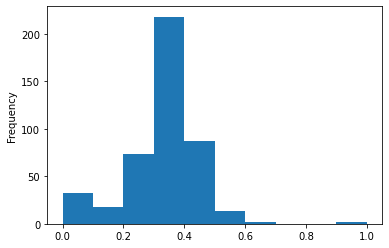

In [39]:
nbaPlayersStats['3P%'].plot(kind='hist', bins = 10)

In [40]:
# This column depends on '3P' and '3PA' column so it should not be replaced. Hence, delete it is the best approach
nbaPlayersStats = nbaPlayersStats[nbaPlayersStats['3P%'] < 0.6]

<AxesSubplot:ylabel='Frequency'>

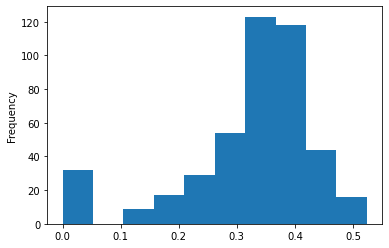

In [41]:
nbaPlayersStats['3P%'].plot(kind='hist', bins = 10)

# I decided to keep these values since it has higher frequency

<AxesSubplot:ylabel='Frequency'>

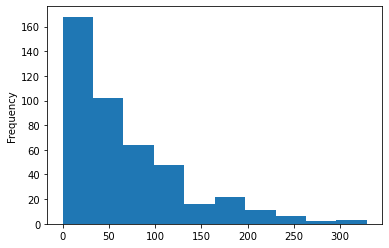

In [42]:
nbaPlayersStats['2P'].plot(kind='hist', bins = 10)

<AxesSubplot:ylabel='Frequency'>

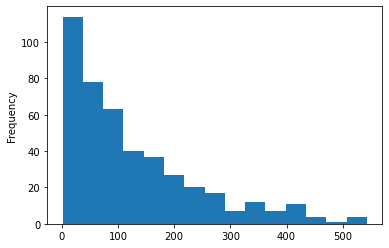

In [43]:
nbaPlayersStats['2PA'].plot(kind='hist', bins = 15)

<AxesSubplot:ylabel='Frequency'>

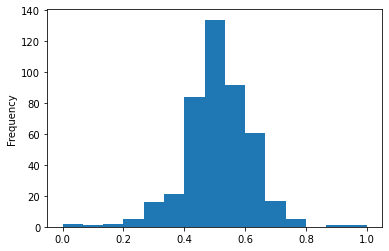

In [44]:
nbaPlayersStats['2P%'].plot(kind='hist', bins = 15)

In [45]:
print(np.sum(nbaPlayersStats['2P%'] > 0.8))
print(np.sum(nbaPlayersStats['2P%'] < 0.1))

2
2


In [46]:
# This column depends on '2P' and '2PA' column so it should not be replaced. Hence, delete it is the best approach
# Moreover, one record from the team 'HOU' which only has one value, this record cannot represent anything
nbaPlayersStats = nbaPlayersStats[nbaPlayersStats['2P%'] < 0.8]
nbaPlayersStats = nbaPlayersStats[nbaPlayersStats['2P%'] >= 0.1]

<AxesSubplot:ylabel='Frequency'>

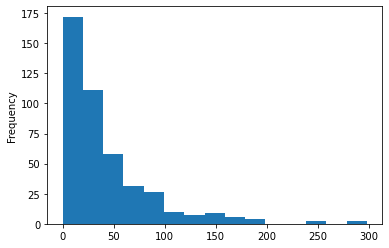

In [47]:
nbaPlayersStats['FT'].plot(kind='hist', bins = 15)

In [48]:
np.sum(nbaPlayersStats['FT'] > 200)

4

In [49]:
# This column affects 'PTS' column. Hence, delete it is the best approach
# Moreover, the corresponding 'FTA' values from these records are also outliers
nbaPlayersStats = nbaPlayersStats[nbaPlayersStats['FT'] <= 200]

<AxesSubplot:ylabel='Frequency'>

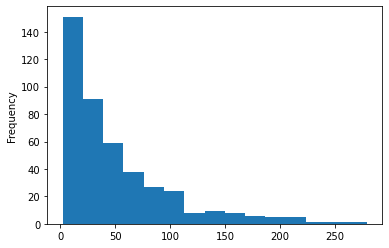

In [50]:
nbaPlayersStats['FTA'].plot(kind='hist', bins = 15)

<AxesSubplot:ylabel='Frequency'>

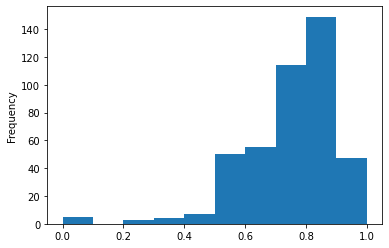

In [51]:
nbaPlayersStats['FT%'].plot(kind='hist', bins = 10)

In [52]:
np.sum(nbaPlayersStats['FT%'] < 0.2)

5

In [53]:
# This column depends on 'FT' and 'FTA' columns. Hence, delete it is the best approach
# Moreover, the frequency is low
nbaPlayersStats = nbaPlayersStats[nbaPlayersStats['FT%'] >= 0.2]

<AxesSubplot:ylabel='Frequency'>

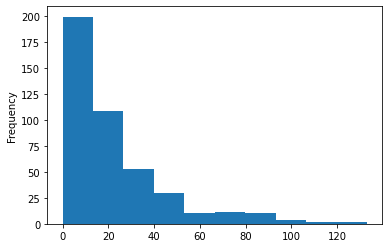

In [54]:
nbaPlayersStats['ORB'].plot(kind='hist', bins = 10)

<AxesSubplot:ylabel='Frequency'>

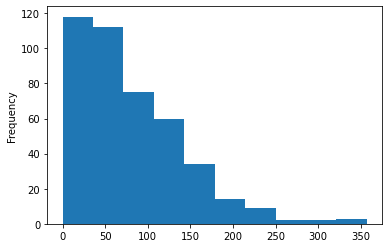

In [55]:
nbaPlayersStats['DRB'].plot(kind='hist', bins = 10)

<AxesSubplot:ylabel='Frequency'>

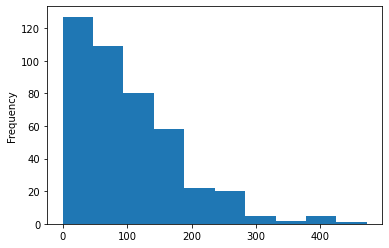

In [56]:
nbaPlayersStats['TRB'].plot(kind='hist', bins = 10)

<AxesSubplot:ylabel='Frequency'>

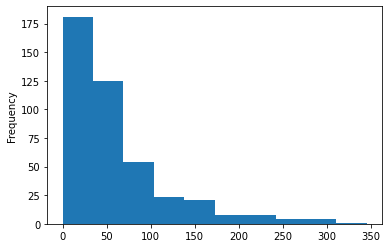

In [57]:
nbaPlayersStats['AST'].plot(kind='hist', bins = 10)

<AxesSubplot:ylabel='Frequency'>

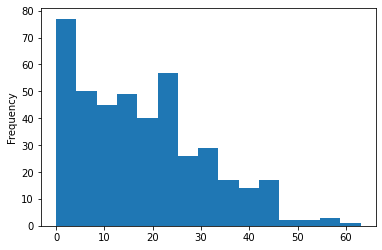

In [58]:
nbaPlayersStats['STL'].plot(kind='hist', bins = 15)

<AxesSubplot:ylabel='Frequency'>

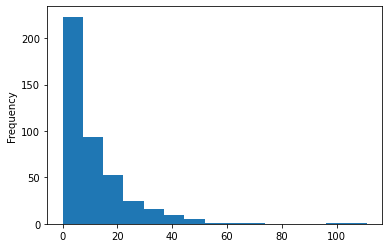

In [59]:
nbaPlayersStats['BLK'].plot(kind='hist', bins = 15)

In [60]:
np.sum(nbaPlayersStats['BLK'] > 55)

5

In [61]:
# Since this feature does not depend on or affect any feature, it can be safely replaced by mean value
meanBLK = round(nbaPlayersStats['BLK'].mean())
nbaPlayersStats['BLK'].mask(cond=(nbaPlayersStats['BLK'] > 55), other=meanBLK, inplace=True)

<AxesSubplot:ylabel='Frequency'>

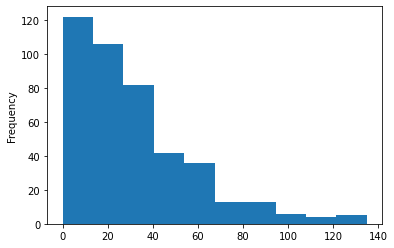

In [62]:
nbaPlayersStats['TOV'].plot(kind='hist', bins = 10)

<AxesSubplot:ylabel='Frequency'>

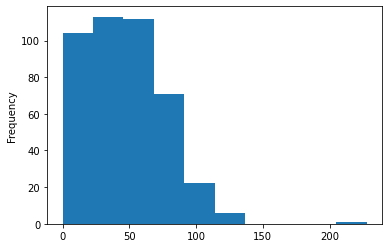

In [63]:
nbaPlayersStats['PF'].plot(kind='hist', bins = 10)

In [64]:
# Since the 'PF' column does not depend on or affect any other column. We can safely replace it with the mean value
# Especially, there is only 1 outlier with much higher value
meanPF = round(nbaPlayersStats['PF'].mean())
nbaPlayersStats['PF'].mask(cond=(nbaPlayersStats['PF'] > 200), other=meanPF, inplace=True)

<AxesSubplot:ylabel='Frequency'>

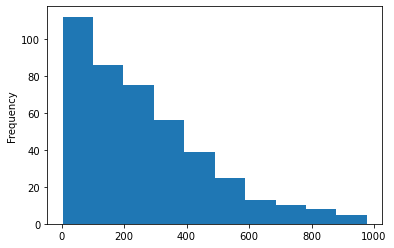

In [65]:
nbaPlayersStats['PTS'].plot(kind='hist', bins = 10)

In [66]:
nbaPlayersStats.shape

(429, 29)

In [67]:
nbaPlayersStats.to_csv('cleaned_NBA_players_stats.csv', sep=',', index=False)

# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

In [68]:
# Code goes after this line by adding cells
filename = 'cleaned_NBA_players_stats.csv'
nbaPlayersStats = pd.read_csv(filename, sep=',', decimal='.')
nbaPlayersStats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
1,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
2,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,288
3,7,Nickeil Alexander-Walker,SG,22,NOP,28,3,495,86,211,...,0.800,5,61,66,54,28,9,32,44,230
4,8,Grayson Allen,SG,25,MEM,23,12,551,67,164,...,0.895,8,57,65,50,23,3,21,30,214


In [69]:
nbaPlayersStats.shape

(429, 29)

In [70]:
# Extract top 5 players with highest total points
top5Players = (nbaPlayersStats.nlargest(5,'PTS'))[['Player', '3P', '2P', 'FT', 'PTS']]

# Print top 5 players
top5Players

,Player,3P,2P,FT,PTS
197,Nikola Jokić,56,323,163,977
218,Zach LaVine,120,230,156,976
189,LeBron James,86,264,144,930
97,Luka Dončić,85,234,193,916
396,Nikola Vučević,96,259,80,886


Text(0, 0.5, 'Points Contributed (Goal)')

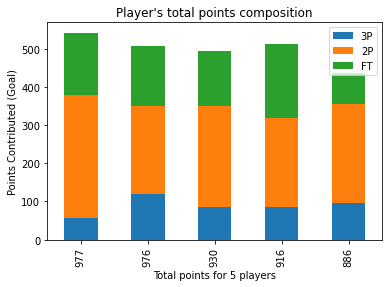

In [71]:
X_AXIS = top5Players['PTS']
POINT_3 = top5Players['3P'].values
POINT_2 = top5Players['2P'].values
FREE_THROW = top5Players['FT'].values

plotdata = pd.DataFrame({
    "3P": POINT_3,
    "2P": POINT_2,
    "FT": FREE_THROW
    }, index=X_AXIS
)

plotdata.plot(kind="bar", stacked=True)
plt.title("Player's total points composition")
plt.xlabel("Total points for 5 players")
plt.ylabel("Points Contributed (Goal)")

Text(0, 0.5, 'Points Contributed (Point)')

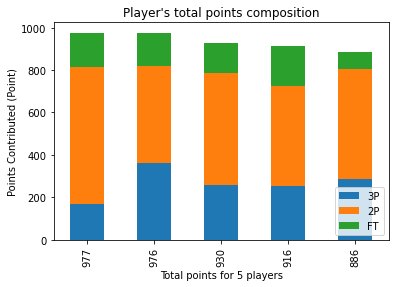

In [72]:
X_AXIS = top5Players['PTS']
POINT_3 = (3*top5Players['3P']).values
POINT_2 = (2*top5Players['2P']).values
FREE_THROW = top5Players['FT'].values

plotdata = pd.DataFrame({
    "3P": POINT_3,
    "2P": POINT_2,
    "FT": FREE_THROW
    }, index=X_AXIS
)

plotdata.plot(kind="bar", stacked=True)
plt.title("Player's total points composition")
plt.xlabel("Total points for 5 players")
plt.ylabel("Points Contributed (Point)")

In [73]:
# Analyze the points from first player
highestPointsPlayer = top5Players.head(1)
totalPoints = highestPointsPlayer['PTS']
goals2P_Percent = round((2*highestPointsPlayer['2P']/totalPoints)*100)
goals3P_Percent = round((3*highestPointsPlayer['3P']/totalPoints)*100)
goalsFT_Percent = 100 - goals2P_Percent - goals3P_Percent
print("Total points composition for the player with the highest total points: \n")
print(f"The percentage of 2-Point Field Goals is: {goals2P_Percent.iloc[0]} \n")
print(f"The percentage of 3-Point Field Goals is: {goals3P_Percent.iloc[0]} \n")
print(f"The percentage of Free Throws is: {goalsFT_Percent.iloc[0]} \n")

Total points composition for the player with the highest total points: 

The percentage of 2-Point Field Goals is: 66.0 

The percentage of 3-Point Field Goals is: 17.0 

The percentage of Free Throws is: 17.0 



In [74]:
# Analyze the 3P contributes to the total points of second player
secondPlayer = top5Players.iloc[[1]]

goals_3P_percentage = round(secondPlayer['3P']/(secondPlayer['2P'] + secondPlayer['3P'] + secondPlayer['FT'])*100)

points_3P_percentage = round((3*secondPlayer['3P'])/secondPlayer['PTS']*100)

print("Total points composition for the player with the highest total points: \n")
print(f"The percentage of 3-Point Field Goals to the total number of goals is: {goals_3P_percentage.iloc[0]} \n")
print(f"The percentage of 3-Point Field Goals to the total points is: {points_3P_percentage.iloc[0]} \n")

Total points composition for the player with the highest total points: 

The percentage of 3-Point Field Goals to the total number of goals is: 24.0 

The percentage of 3-Point Field Goals to the total points is: 37.0 



In [75]:
second = top5Players.iloc[[1]]
third = top5Players.iloc[[2]]
fourth = top5Players.iloc[[3]]
last = top5Players.iloc[[4]]

second_2P = round(2*second['2P']/second['PTS']*100).iloc[0]
third_2P = round(2*third['2P']/third['PTS']*100).iloc[0]
fourth_2P = round(2*fourth['2P']/fourth['PTS']*100).iloc[0]
last_2P = round(2*last['2P']/last['PTS']*100).iloc[0]


second_3P = round(3*second['3P']/second['PTS']*100).iloc[0]
third_3P = round(3*third['3P']/third['PTS']*100).iloc[0]
fourth_3P = round(3*fourth['3P']/fourth['PTS']*100).iloc[0]
last_3P = round(3*last['3P']/last['PTS']*100).iloc[0]

second_FT = round(second['FT']/second['PTS']*100).iloc[0]
third_FT = round(third['FT']/third['PTS']*100).iloc[0]
fourth_FT = round(fourth['FT']/fourth['PTS']*100).iloc[0]
last_FT = round(last['FT']/last['PTS']*100).iloc[0]

print("The percentage of 2P contributed to total points: \n")
print(f"Second player: {second_2P} \n")
print(f"Third player: {third_2P} \n")
print(f"Fourth player: {fourth_2P} \n")
print(f"Last player: {last_2P} \n")

print("The percentage of 3P contributed to total points: \n")
print(f"Second player: {second_3P} \n")
print(f"Third player: {third_3P} \n")
print(f"Fourth player: {fourth_3P} \n")
print(f"Last player: {last_3P} \n")

print("The percentage of FT contributed to total points: \n")
print(f"Second player: {second_FT} \n")
print(f"Third player: {third_FT} \n")
print(f"Fourth player: {fourth_FT} \n")
print(f"Last player: {last_FT} \n")

The percentage of 2P contributed to total points: 

Second player: 47.0 

Third player: 57.0 

Fourth player: 51.0 

Last player: 58.0 

The percentage of 3P contributed to total points: 

Second player: 37.0 

Third player: 28.0 

Fourth player: 28.0 

Last player: 33.0 

The percentage of FT contributed to total points: 

Second player: 16.0 

Third player: 15.0 

Fourth player: 21.0 

Last player: 9.0 



## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


In [76]:
# Code goes after this line by adding cells
filename = 'NBA_players_stats.csv'
originalDataset = pd.read_csv(filename, sep=',', decimal='.')
updatingDataset = pd.read_csv(filename, sep=',', decimal='.')
print(originalDataset.head())
print(updatingDataset.head())

   Rk             Player Pos  Age    Tm   G  GS    MP   FG  FGA  ...    FT%  \
0   1   Precious Achiuwa  PF   21   MIA  35   2   491   84  145  ...  0.543   
1   2       Jaylen Adams  PG   24   MIL   7   0    18    1    8  ...    NaN   
2   3       Steven Adams   C   27   NOP  33  33   918  115  187  ...  0.443   
3   4        Bam Adebayo   C   23   MIA  33  33  1119  236  419  ...  0.847   
4   5  LaMarcus Aldridge   C   35  SAS   21  18   544  115  248  ...  0.838   

   ORB  DRB  TRB  AST  STL  BLK  TOV  PF    PTS  
0   46   95  141   20   15   19   32  58    212  
1    0    3    3    2    0    0    0   1  20000  
2  133  161  294   69   29   20   50  63    265  
3   72  241  313  179   29   34   98  80    634  
4   17   77   94   36    8   18   20  36  28800  

[5 rows x 29 columns]
   Rk             Player Pos  Age    Tm   G  GS    MP   FG  FGA  ...    FT%  \
0   1   Precious Achiuwa  PF   21   MIA  35   2   491   84  145  ...  0.543   
1   2       Jaylen Adams  PG   24   MIL   7 

In [77]:
updatingDataset = updatingDataset[updatingDataset['3PA'] != 0]
originalDataset = originalDataset[originalDataset['3PA'] != 0]

In [78]:
updatingDataset['3P%'] = round((updatingDataset['3P']/updatingDataset['3PA']), 3)

Text(0, 0.5, 'Density')

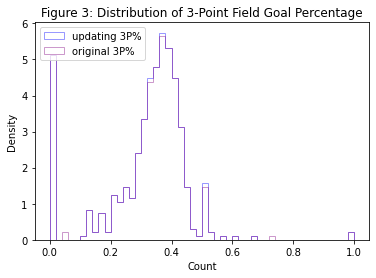

In [79]:
plt.hist(updatingDataset['3P%'], histtype='step', bins=50, alpha=0.4,
     label="updating 3P%", color="blue", density=True)
plt.legend(loc="upper left")


plt.hist(originalDataset['3P%'], histtype='step', bins=50, alpha=0.4,
     label="original 3P%", color="purple", density=True)
plt.legend(loc="upper left")

plt.title('Figure 3: Distribution of 3-Point Field Goal Percentage')
plt.xlabel('Count')
plt.ylabel('Density')

In [80]:
np.sum(originalDataset['3P%'] != updatingDataset['3P%'])

71

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


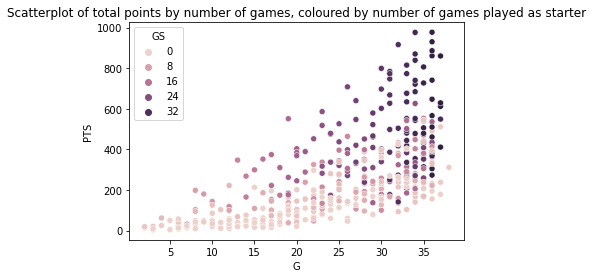

In [81]:
# Code goes after this line by adding cells
# Creating a scatter plot
sns.scatterplot(nbaPlayersStats['G'], nbaPlayersStats['PTS'], hue = nbaPlayersStats['GS'])
plt.title('Scatterplot of total points by number of games, coloured by number of games played as starter')
plt.show()

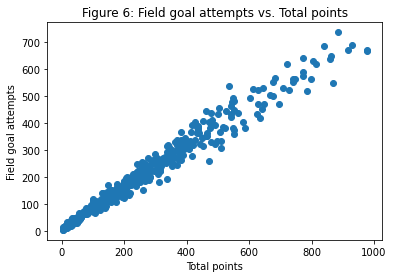

In [82]:
#Plotting the graph
x = nbaPlayersStats['PTS']
y = nbaPlayersStats['FGA']
plt.scatter(x,y)
plt.title('Figure 6: Field goal attempts vs. Total points')
plt.xlabel('Total points')
plt.ylabel('Field goal attempts')
plt.show();

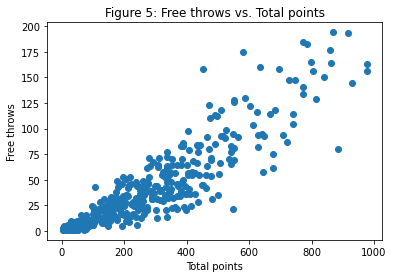

In [83]:
#Plotting the graph
x = nbaPlayersStats['PTS']
y = nbaPlayersStats['FT']
plt.scatter(x,y)
plt.title('Figure 5: Free throws vs. Total points')
plt.xlabel('Total points')
plt.ylabel('Free throws')
plt.show();